In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
hbv_era5 = pd.read_csv('HBV_era5.csv')
hbv_lstm = pd.read_csv('HBV_lstm.csv')

# Create a date range for the data
date_range = pd.date_range(start="2010-01-01", end="2016-12-31", freq='D')

# Add the date column to the dataframes
hbv_era5['date'] = date_range
hbv_lstm['date'] = date_range


In [12]:
import numpy as np

def calculate_nse(q_sim, q_obs, n=0):
    """
    Calculate the Nash-Sutcliffe Efficiency (NSE) between simulated and observed values, ignoring NaNs
    and the first 'n' values.
    
    Parameters:
    q_sim (array-like): Simulated discharge values.
    q_obs (array-like): Observed discharge values.
    n (int): Number of initial values to ignore in the calculation (default is 0).
    
    Returns:
    float: NSE value
    """
    # Slice the arrays to ignore the first 'n' values
    q_sim = q_sim[n:]
    q_obs = q_obs[n:]
    
    # Remove NaN values from both arrays
    mask = ~np.isnan(q_sim) & ~np.isnan(q_obs)
    q_sim_clean = q_sim[mask]
    q_obs_clean = q_obs[mask]

    # Calculate NSE
    numerator = np.sum((q_obs_clean - q_sim_clean) ** 2)
    denominator = np.sum((q_obs_clean - np.mean(q_obs_clean)) ** 2)
    
    nse = 1 - (numerator / denominator)
    return nse


In [2]:


def calculate_nse(q_sim, q_obs, n=0):
    """
    Calculate the Nash-Sutcliffe Efficiency (NSE) between simulated and observed values, 
    ignoring NaNs and the first 'n' values.
    
    Parameters:
    q_sim (array-like): Simulated discharge values.
    q_obs (array-like): Observed discharge values.
    n (int): Number of initial values to ignore in the calculation (default is 0).
    
    Returns:
    float: NSE value
    """
    # Slice the arrays to ignore the first 'n' values
    q_sim = q_sim[n:]
    q_obs = q_obs[n:]
    
    # Remove NaN values from both arrays
    mask = ~np.isnan(q_sim) & ~np.isnan(q_obs)
    q_sim_clean = q_sim[mask]
    q_obs_clean = q_obs[mask]

    # Calculate NSE
    numerator = np.sum((q_obs_clean - q_sim_clean) ** 2)
    denominator = np.sum((q_obs_clean - np.mean(q_obs_clean)) ** 2)
    
    nse = 1 - (numerator / denominator)
    return nse

def calculate_log_nse(q_sim, q_obs, n=0):
    """
    Calculate the Logarithmic Nash-Sutcliffe Efficiency (LogNSE) between simulated and observed values, 
    ignoring NaNs and the first 'n' values.
    
    Parameters:
    q_sim (array-like): Simulated discharge values.
    q_obs (array-like): Observed discharge values.
    n (int): Number of initial values to ignore in the calculation (default is 0).
    
    Returns:
    float: LogNSE value
    """
    # Slice the arrays to ignore the first 'n' values
    q_sim = q_sim[n:]
    q_obs = q_obs[n:]
    
    # Remove NaN values from both arrays
    mask = ~np.isnan(q_sim) & ~np.isnan(q_obs)
    q_sim_clean = q_sim[mask]
    q_obs_clean = q_obs[mask]
    
    # Apply log transformation (add a small value to avoid log(0) issues)
    q_sim_log = np.log(q_sim_clean + 1e-6)
    q_obs_log = np.log(q_obs_clean + 1e-6)
    
    # Calculate LogNSE
    numerator = np.sum((q_obs_log - q_sim_log) ** 2)
    denominator = np.sum((q_obs_log - np.mean(q_obs_log)) ** 2)
    
    log_nse = 1 - (numerator / denominator)
    return log_nse



In [13]:
# Example usage
q_obs = np.array(hbv_era5['q_obs'])  # Replace with actual observed data
q_sim = np.array(hbv_era5['q_sim'])  # Replace with actual simulated data

nse_value = calculate_nse(q_sim, q_obs, n=90)  # Adjust 'n' if needed
log_nse_value = calculate_log_nse(q_sim, q_obs, n=90)  # Adjust 'n' if needed

print("NSE:", nse_value)
print("LogNSE:", log_nse_value)

NSE: 0.5380261486138592
LogNSE: 0.3400025059696826


In [14]:
# Example usage
q_obs = np.array(hbv_lstm['q_obs'])  # Replace with actual observed data
q_sim = np.array(hbv_lstm['q_sim'])  # Replace with actual simulated data

nse_value = calculate_nse(q_sim, q_obs, n=90)  # Adjust 'n' if needed
log_nse_value = calculate_log_nse(q_sim, q_obs, n=90)  # Adjust 'n' if needed

print("NSE:", nse_value)
print("LogNSE:", log_nse_value)

NSE: 0.5938227967879095
LogNSE: 0.13590677789740335


In [16]:
# Ignore the first 30 values (for example)
nse_era5 = calculate_nse(hbv_era5['q_sim'].values, hbv_era5['q_obs'].values, n=365)
nse_lstm = calculate_nse(hbv_lstm['q_sim'].values, hbv_lstm['q_obs'].values, n=365)

print(f"NSE for HBV_era5 (ignoring first 90 values): {nse_era5}")
print(f"NSE for HBV_lstm (ignoring first 90 values): {nse_lstm}")


NSE for HBV_era5 (ignoring first 90 values): 0.5698215957725576
NSE for HBV_lstm (ignoring first 90 values): 0.6367517663492606


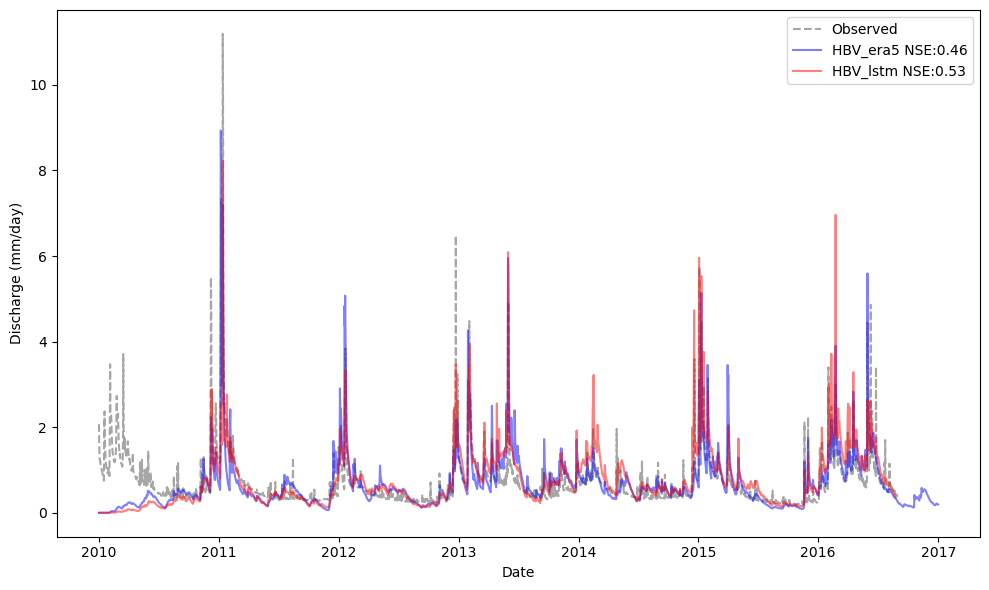

In [17]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot q_obs for HBV_era5
plt.plot(hbv_era5['date'], hbv_era5['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha =0.7)

# Plot q_sim for HBV_era5
plt.plot(hbv_era5['date'], hbv_era5['q_sim'], label='HBV_era5 NSE:0.46', color='blue', alpha =0.5)

# Plot q_sim for HBV_lstm
plt.plot(hbv_lstm['date'], hbv_lstm['q_sim'], label='HBV_lstm NSE:0.53', color='red', alpha =0.5)


# Customize the plot
plt.xlabel('Date')
plt.ylabel('Discharge (mm/day)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


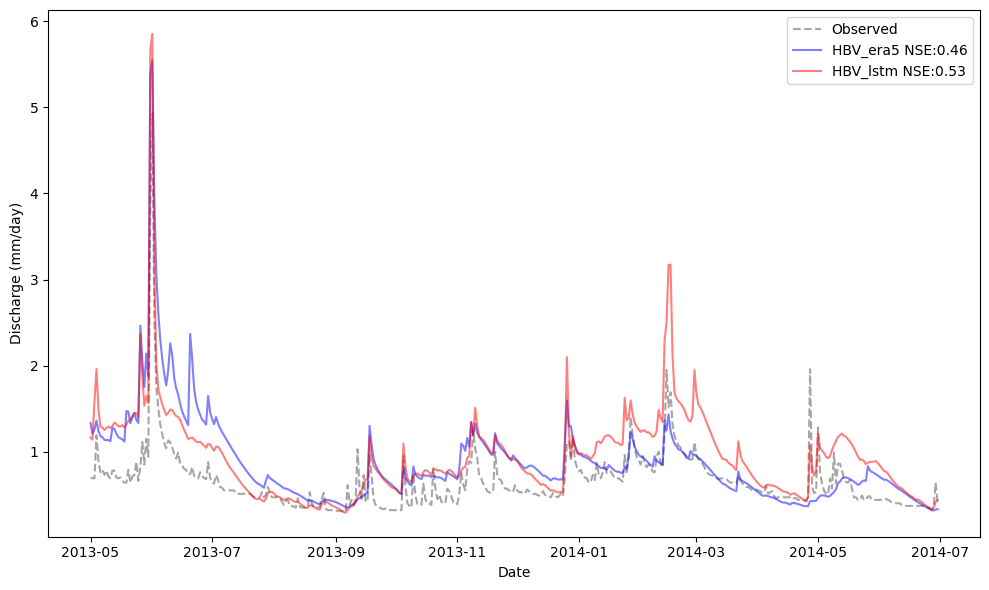

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the custom date range
start_date = '2013-05-01'
end_date = '2014-06-30'

# Convert the 'date' columns to datetime format (if not already done)
hbv_era5['date'] = pd.to_datetime(hbv_era5['date'])
hbv_lstm['date'] = pd.to_datetime(hbv_lstm['date'])

# Filter data based on the custom date range
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot q_obs for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.7)

# Plot q_sim for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5 NSE:0.46', color='blue', alpha=0.5)

# Plot q_sim for HBV_lstm
plt.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm NSE:0.53', color='red', alpha=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Discharge (mm/day)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


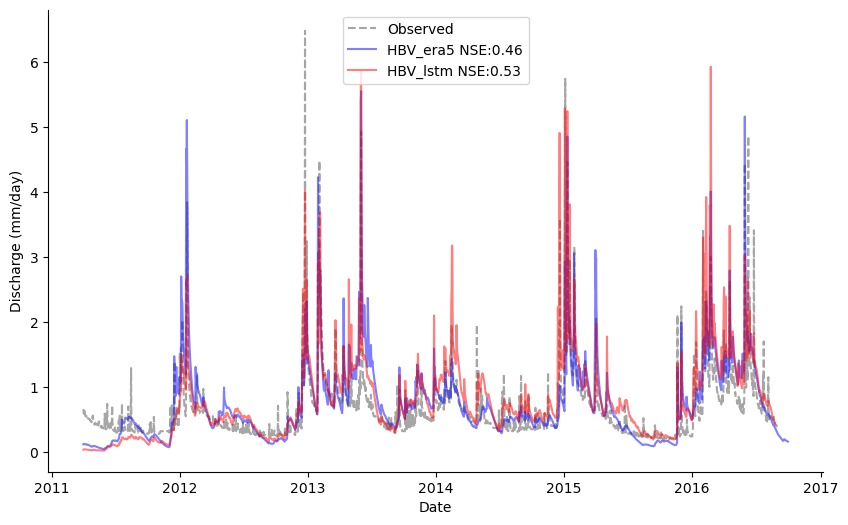

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set the custom date range
start_date = '2011-04-01'
end_date = '2016-09-30'

# Convert the 'date' columns to datetime format (if not already done)
hbv_era5['date'] = pd.to_datetime(hbv_era5['date'])
hbv_lstm['date'] = pd.to_datetime(hbv_lstm['date'])

# Filter data based on the custom date range
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot q_obs for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.7)

# Plot q_sim for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5 NSE:0.46', color='blue', alpha=0.5)

# Plot q_sim for HBV_lstm
plt.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm NSE:0.53', color='red', alpha=0.5)


# Customize the plot
plt.xlabel('Date')
plt.ylabel('Discharge (mm/day)')
plt.legend(loc='upper center')

# Remove the top and right spines (the box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Show the plot

plt.show()


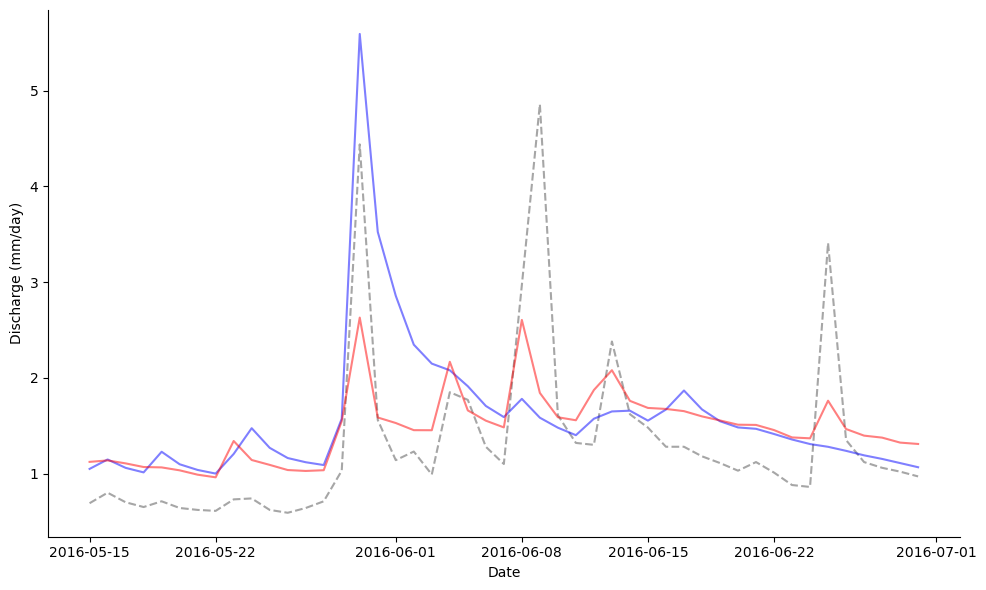

In [18]:
# Set the custom date range
start_date = '2016-05-15'
end_date = '2016-06-30'

# Convert the 'date' columns to datetime format (if not already done)
hbv_era5['date'] = pd.to_datetime(hbv_era5['date'])
hbv_lstm['date'] = pd.to_datetime(hbv_lstm['date'])

# Filter data based on the custom date range
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot q_obs for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.7)

# Plot q_sim for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5', color='blue', alpha=0.5)

# Plot q_sim for HBV_lstm
plt.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm', color='red', alpha=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Discharge (mm/day)')

plt.tight_layout()
# Remove the top and right spines (the box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

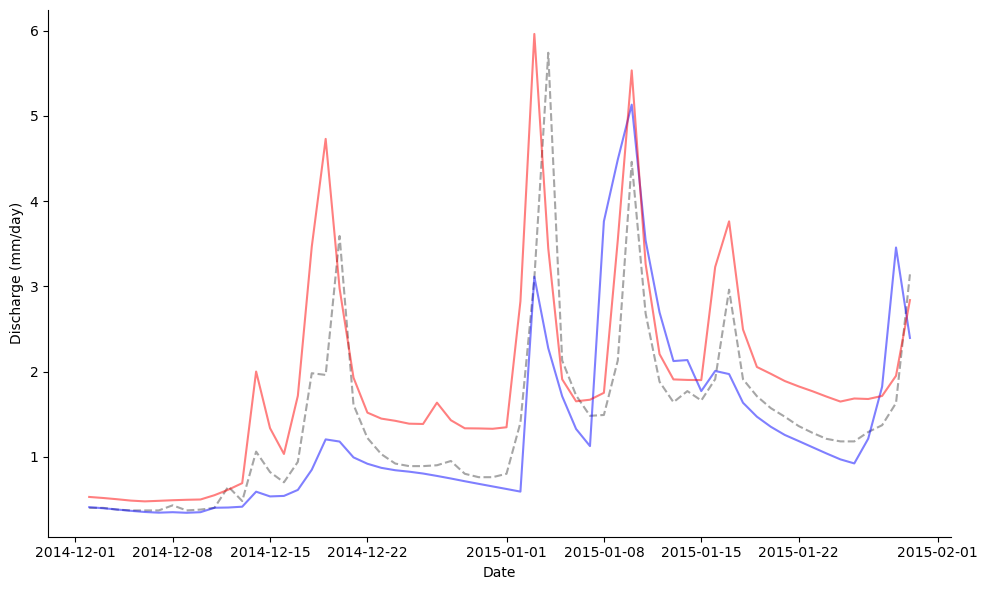

In [19]:
# Set the custom date range
start_date = '2014-12-02'
end_date = '2015-01-30'

# Convert the 'date' columns to datetime format (if not already done)
hbv_era5['date'] = pd.to_datetime(hbv_era5['date'])
hbv_lstm['date'] = pd.to_datetime(hbv_lstm['date'])

# Filter data based on the custom date range
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot q_obs for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.7)

# Plot q_sim for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5', color='blue', alpha=0.5)

# Plot q_sim for HBV_lstm
plt.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm', color='red', alpha=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Discharge (mm/day)')

plt.tight_layout()
# Remove the top and right spines (the box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

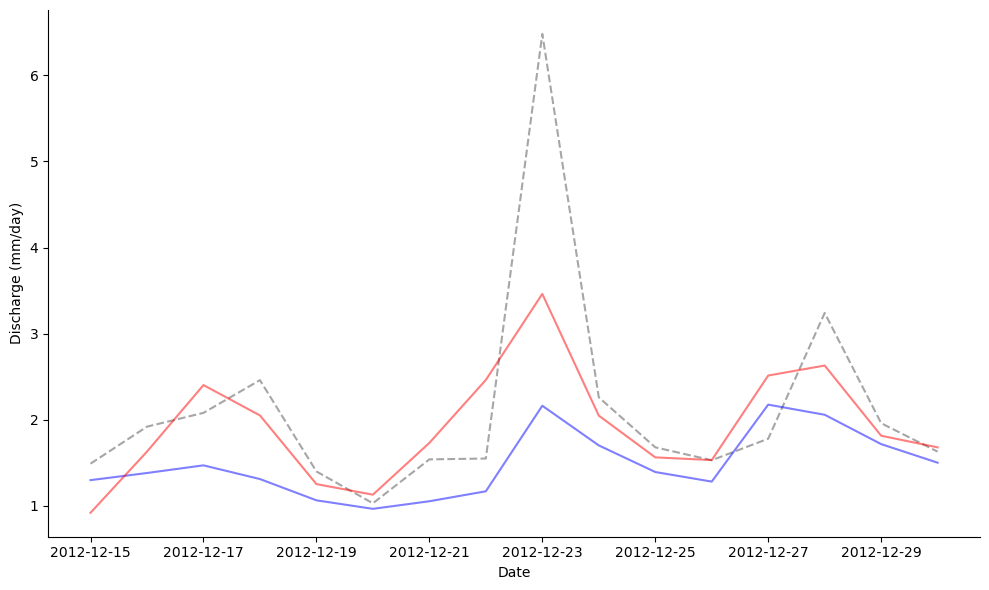

In [20]:
# Set the custom date range
start_date = '2012-12-15'
end_date = '2012-12-30'

# Convert the 'date' columns to datetime format (if not already done)
hbv_era5['date'] = pd.to_datetime(hbv_era5['date'])
hbv_lstm['date'] = pd.to_datetime(hbv_lstm['date'])

# Filter data based on the custom date range
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot q_obs for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.7)

# Plot q_sim for HBV_era5
plt.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5', color='blue', alpha=0.5)

# Plot q_sim for HBV_lstm
plt.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm', color='red', alpha=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Discharge (mm/day)')

plt.tight_layout()
# Remove the top and right spines (the box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

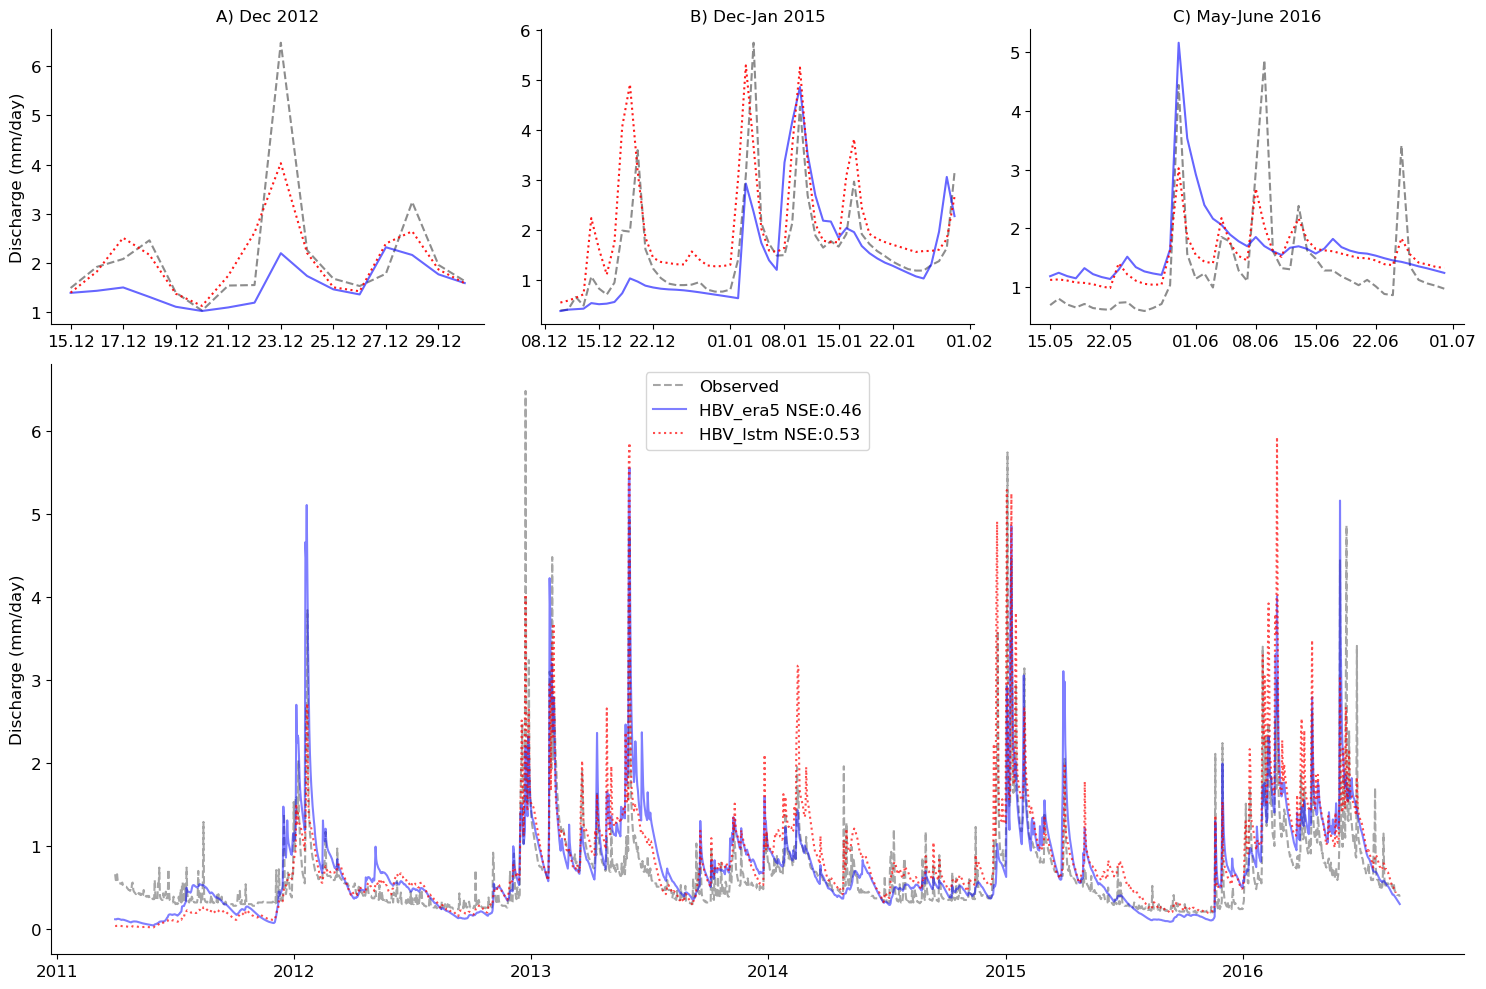

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates  # Importing the date formatter

# Create the subplots with specific gridspec configuration
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 2])  # 2 rows, 3 columns; 2nd row is larger

# Adjust space between plots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Top row: Three horizontal subplots
# First Event
start_date = '2016-05-15'
end_date = '2016-06-30'
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]
ax1 = fig.add_subplot(gs[0, 2])
ax1.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.9)
ax1.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5', color='blue', alpha=0.6)
ax1.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm', color='red', alpha=0.9, linestyle='dotted')
ax1.set_title('C) May-June 2016',fontsize=12)
#ax1.set_ylabel('Discharge (mm/day)',fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
# Format the x-axis for ax1
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
# Remove top and right spines for ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Second Event
start_date = '2014-12-10'
end_date = '2015-01-30'
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.9)
ax2.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5', color='blue', alpha=0.6)
ax2.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm', color='red', alpha=0.9, linestyle='dotted')
ax2.set_title('B) Dec-Jan 2015',fontsize=12)
ax2.tick_params(axis='both', labelsize=12)
# Format the x-axis for ax1

#ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show every 5 days
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
#ax2.set_ylabel('Discharge (mm/day)')
# Remove top and right spines for ax2
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Third Event
start_date = '2012-12-15'
end_date = '2012-12-30'
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]
ax3 = fig.add_subplot(gs[0, 0])
ax3.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.9)
ax3.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5', color='blue', alpha=0.6)
ax3.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm', color='red', alpha=0.9, linestyle='dotted')
ax3.set_title('A) Dec 2012',fontsize=12)
ax3.set_ylabel('Discharge (mm/day)',fontsize=12)
ax3.tick_params(axis='both', labelsize=12)
# Format the x-axis for ax1
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
#ax3.set_ylabel('Discharge (mm/day)')
# Remove top and right spines for ax3
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Bottom row: One larger subplot that spans the width of the bottom row
ax_bottom = fig.add_subplot(gs[1, :])  # This will span all three columns
start_date = '2011-04-01'
end_date = '2016-08-30'
hbv_era5_filtered = hbv_era5[(hbv_era5['date'] >= start_date) & (hbv_era5['date'] <= end_date)]
hbv_lstm_filtered = hbv_lstm[(hbv_lstm['date'] >= start_date) & (hbv_lstm['date'] <= end_date)]
ax_bottom.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_obs'], label='Observed', color='grey', linestyle='dashed', alpha=0.7)
ax_bottom.plot(hbv_era5_filtered['date'], hbv_era5_filtered['q_sim'], label='HBV_era5 NSE:0.46', color='blue', alpha=0.5)
ax_bottom.plot(hbv_lstm_filtered['date'], hbv_lstm_filtered['q_sim'], label='HBV_lstm NSE:0.53', color='red', alpha=0.7, linestyle='dotted')
ax_bottom.legend(loc='upper center',fontsize=12)
#ax_bottom.set_title('Catchment: Elsenz Schwarzbach')
ax_bottom.set_ylabel('Discharge (mm/day)',fontsize=12)
ax_bottom.tick_params(axis='both', labelsize=12)
# Remove top and right spines for ax_bottom
ax_bottom.spines['top'].set_visible(False)
ax_bottom.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
#plt.savefig('Figure4.jpeg',dpi=1200)
plt.show()
